In [1]:
#common imports
import numpy as np
import pandas as pd
import sklearn

fileName = "bankloans.csv"

data1 = pd.read_csv("bankloans.csv")

#renaming and removing unneeded columns
data1 = data1.drop(columns = ['employ', 'address', 'creddebt'])
data1 = data1.rename(columns={"age": "Age", "ed": "Education", "income": "Income", "debtinc": "DTI", "othdebt": "Debt", "default": "Default"})
data1['Income'] = data1['Income']*1000
data1['Debt'] = data1['Debt']*1000

data1

,Age,Education,Income,DTI,Debt,Default
0,41,3,176000,9.3,5008.608,1.0
1,27,1,31000,17.3,4000.798,0.0
2,40,1,55000,5.5,2168.925,0.0
3,41,1,120000,2.9,821.280,0.0
4,24,2,28000,17.3,3056.564,1.0
...,...,...,...,...,...,...
1145,34,1,32000,2.7,624.672,NaN
1146,32,2,116000,5.7,2585.292,NaN
1147,48,1,38000,10.8,3381.696,NaN
1148,35,2,24000,7.8,1454.544,NaN


In [2]:
fileName = "credit_risk_dataset.csv"

data2 = pd.read_csv("credit_risk_dataset.csv")
#renaming and removing unneeded columns
data2 = data2.drop(columns = ['person_home_ownership', 'person_emp_length', 'loan_grade', 'loan_int_rate', 'cb_person_cred_hist_length'])
data2 = data2.rename(columns={"person_age": "Age", "person_income": "Income", "loan_intent": "Use of Funds", "loan_amnt": "Loan Amount", "loan_status": "Default", "loan_percent_income": "LTI", "cb_person_default_on_file": "Previous Default"})
data2

,Age,Income,Use of Funds,Loan Amount,Default,LTI,Previous Default
0,22,59000,PERSONAL,35000,1,0.59,Y
1,21,9600,EDUCATION,1000,0,0.10,N
2,25,9600,MEDICAL,5500,1,0.57,N
3,23,65500,MEDICAL,35000,1,0.53,N
4,24,54400,MEDICAL,35000,1,0.55,Y
...,...,...,...,...,...,...,...
32576,57,53000,PERSONAL,5800,0,0.11,N
32577,54,120000,PERSONAL,17625,0,0.15,N
32578,65,76000,HOMEIMPROVEMENT,35000,1,0.46,N
32579,56,150000,PERSONAL,15000,0,0.10,N


In [3]:
db = [data1, data2]
custdb = pd.concat(db)
custdb

,Age,Education,Income,DTI,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default
0,41,3.0,176000,9.3,5008.608,1.0,NaN,NaN,NaN,NaN
1,27,1.0,31000,17.3,4000.798,0.0,NaN,NaN,NaN,NaN
2,40,1.0,55000,5.5,2168.925,0.0,NaN,NaN,NaN,NaN
3,41,1.0,120000,2.9,821.280,0.0,NaN,NaN,NaN,NaN
4,24,2.0,28000,17.3,3056.564,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32576,57,NaN,53000,NaN,NaN,0.0,PERSONAL,5800.0,0.11,N
32577,54,NaN,120000,NaN,NaN,0.0,PERSONAL,17625.0,0.15,N
32578,65,NaN,76000,NaN,NaN,1.0,HOMEIMPROVEMENT,35000.0,0.46,N
32579,56,NaN,150000,NaN,NaN,0.0,PERSONAL,15000.0,0.10,N


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.neighbors import KNeighborsClassifier

# edu KNN
#Converting dataframe to remove null values to train
custdb2 = custdb.dropna(subset=['Education'])

#formatting response & feature data
features = custdb2.drop(columns=['Education'])
response = custdb2['Education']

#Encoding the features and response
features_label1 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_label = features_label1.fit_transform(features)

response_label1 = LabelEncoder()
response_label = response_label1.fit_transform(response)

#creating dataframe of only missing values for testing
custdb3 = custdb[custdb['Education'].isna()]

#formatting response & feature data
features2 = custdb3.drop(columns=['Education'])
response2 = custdb3['Education']

#Encoding the features and response
features_label2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_labelnew = features_label1.transform(features2)


#fitting the missing values using KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(features_label, response_label)
missing_values1 = knn.predict(features_labelnew)

#Returning the predicted values to the original label
missing_values = response_label1.inverse_transform(missing_values1)

#combining dataframes to add the predicted missing values
features2['Education'] = missing_values

EDUdb = custdb2.append(features2)
EDUdb

/Users/noahball/tensorflow/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/2876692792.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  EDUdb = custdb2.append(features2)


,Age,Education,Income,DTI,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default
0,41,3.0,176000,9.3,5008.608,1.0,NaN,NaN,NaN,NaN
1,27,1.0,31000,17.3,4000.798,0.0,NaN,NaN,NaN,NaN
2,40,1.0,55000,5.5,2168.925,0.0,NaN,NaN,NaN,NaN
3,41,1.0,120000,2.9,821.280,0.0,NaN,NaN,NaN,NaN
4,24,2.0,28000,17.3,3056.564,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32576,57,1.0,53000,NaN,NaN,0.0,PERSONAL,5800.0,0.11,N
32577,54,1.0,120000,NaN,NaN,0.0,PERSONAL,17625.0,0.15,N
32578,65,1.0,76000,NaN,NaN,1.0,HOMEIMPROVEMENT,35000.0,0.46,N
32579,56,1.0,150000,NaN,NaN,0.0,PERSONAL,15000.0,0.10,N


In [5]:
# default KNN
#Converting dataframe to remove null values to train
custdb3 = EDUdb.dropna(subset=['Default'])

#formatting response & feature data
features = custdb3.drop(columns=['Default'])
response = custdb3['Default']

#Encoding the features and response
features_label1 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_label = features_label1.fit_transform(features)

response_label1 = LabelEncoder()
response_label = response_label1.fit_transform(response)

#creating dataframe of only missing values for testing
custdb4 = EDUdb[EDUdb['Default'].isna()]

#formatting response & feature data
features2 = custdb4.drop(columns=['Default'])
response2 = custdb4['Default']

#Encoding the features and response
features_label2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_labelnew = features_label1.transform(features2)


#fitting the missing values using KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(features_label, response_label)
missing_values1 = knn.predict(features_labelnew)

#Returning the predicted values to the original label
missing_values = response_label1.inverse_transform(missing_values1)

#combining dataframes to add the predicted missing values
features2['Default'] = missing_values

Defdb = custdb3.append(features2)
Defdb

/Users/noahball/tensorflow/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/305962093.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Defdb = custdb3.append(features2)


,Age,Education,Income,DTI,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default
0,41,3.0,176000,9.3,5008.608,1.0,NaN,NaN,NaN,NaN
1,27,1.0,31000,17.3,4000.798,0.0,NaN,NaN,NaN,NaN
2,40,1.0,55000,5.5,2168.925,0.0,NaN,NaN,NaN,NaN
3,41,1.0,120000,2.9,821.280,0.0,NaN,NaN,NaN,NaN
4,24,2.0,28000,17.3,3056.564,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1145,34,1.0,32000,2.7,624.672,0.0,NaN,NaN,NaN,NaN
1146,32,2.0,116000,5.7,2585.292,1.0,NaN,NaN,NaN,NaN
1147,48,1.0,38000,10.8,3381.696,0.0,NaN,NaN,NaN,NaN
1148,35,2.0,24000,7.8,1454.544,0.0,NaN,NaN,NaN,NaN


In [6]:
# debt KNN
#Converting dataframe to remove null values to train
custdb5 = Defdb.dropna(subset=['Debt'])

#formatting response & feature data
features = custdb5.drop(columns=['Debt'])
response = custdb5['Debt']

#Encoding the features and response
features_label1 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_label = features_label1.fit_transform(features)

response_label1 = LabelEncoder()
response_label = response_label1.fit_transform(response)

#creating dataframe of only missing values for testing
custdb6 = Defdb[Defdb['Debt'].isna()]

#formatting response & feature data
features2 = custdb6.drop(columns=['Debt'])
response2 = custdb6['Debt']

#Encoding the features and response
features_label2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_labelnew = features_label1.transform(features2)


#fitting the missing values using KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(features_label, response_label)
missing_values1 = knn.predict(features_labelnew)

#Returning the predicted values to the original label
missing_values = response_label1.inverse_transform(missing_values1)

#combining dataframes to add the predicted missing values
features2['Debt'] = missing_values

Debtdb = custdb5.append(features2)
Debtdb

/Users/noahball/tensorflow/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/1001609509.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Debtdb = custdb5.append(features2)


,Age,Education,Income,DTI,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default
0,41,3.0,176000,9.3,5008.608,1.0,NaN,NaN,NaN,NaN
1,27,1.0,31000,17.3,4000.798,0.0,NaN,NaN,NaN,NaN
2,40,1.0,55000,5.5,2168.925,0.0,NaN,NaN,NaN,NaN
3,41,1.0,120000,2.9,821.280,0.0,NaN,NaN,NaN,NaN
4,24,2.0,28000,17.3,3056.564,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32576,57,1.0,53000,NaN,1770.783,0.0,PERSONAL,5800.0,0.11,N
32577,54,1.0,120000,NaN,821.280,0.0,PERSONAL,17625.0,0.15,N
32578,65,1.0,76000,NaN,747.600,1.0,HOMEIMPROVEMENT,35000.0,0.46,N
32579,56,1.0,150000,NaN,1330.758,0.0,PERSONAL,15000.0,0.10,N


In [7]:
#intent
#Converting dataframe to remove null values to train
custdb7 = Debtdb.dropna(subset=['Use of Funds'])

#formatting response & feature data
features = custdb7.drop(columns=['Use of Funds'])
response = custdb7['Use of Funds']

#Encoding the features and response
features_label1 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_label = features_label1.fit_transform(features)

response_label1 = LabelEncoder()
response_label = response_label1.fit_transform(response)

#creating dataframe of only missing values for testing
custdb8 = Debtdb[Debtdb['Use of Funds'].isna()]

#formatting response & feature data
features2 = custdb8.drop(columns=['Use of Funds'])
response2 = custdb8['Use of Funds']

#Encoding the features and response
features_label2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_labelnew = features_label1.transform(features2)


#fitting the missing values using KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(features_label, response_label)
missing_values1 = knn.predict(features_labelnew)

#Returning the predicted values to the original label
missing_values = response_label1.inverse_transform(missing_values1)

#combining dataframes to add the predicted missing values
features2['Use of Funds'] = missing_values

Intdb = custdb7.append(features2)
Intdb

/Users/noahball/tensorflow/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/3562733747.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Intdb = custdb7.append(features2)


,Age,Education,Income,DTI,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default
0,22,1.0,59000,NaN,2107.872,1.0,PERSONAL,35000.0,0.59,Y
1,21,1.0,9600,NaN,821.280,0.0,EDUCATION,1000.0,0.10,N
2,25,1.0,9600,NaN,868.320,1.0,MEDICAL,5500.0,0.57,N
3,23,1.0,65500,NaN,529.590,1.0,MEDICAL,35000.0,0.53,N
4,24,1.0,54400,NaN,823.050,1.0,MEDICAL,35000.0,0.55,Y
...,...,...,...,...,...,...,...,...,...,...
1145,34,1.0,32000,2.7,624.672,0.0,HOMEIMPROVEMENT,NaN,NaN,NaN
1146,32,2.0,116000,5.7,2585.292,1.0,DEBTCONSOLIDATION,NaN,NaN,NaN
1147,48,1.0,38000,10.8,3381.696,0.0,EDUCATION,NaN,NaN,NaN
1148,35,2.0,24000,7.8,1454.544,0.0,DEBTCONSOLIDATION,NaN,NaN,NaN


In [8]:
import random
# loan ammt
#Converting dataframe to remove null values to train
custdb9 = Intdb.dropna(subset=['Loan Amount'])

#creating dataframe of only missing values for testing
custdb10 = Intdb[Intdb['Loan Amount'].isna()]

custdb10['Loan Amount'] = np.random.randint(1, 50, 1150)
custdb10['Loan Amount'] = custdb10['Loan Amount']*1000

Loandb = custdb9.append(custdb10)
Loandb

/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/2823166341.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custdb10['Loan Amount'] = np.random.randint(1, 50, 1150)
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/2823166341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custdb10['Loan Amount'] = custdb10['Loan Amount']*1000
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/2823166341.py:12: FutureWarning: The frame.append method is deprecated and wil

,Age,Education,Income,DTI,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default
0,22,1.0,59000,NaN,2107.872,1.0,PERSONAL,35000.0,0.59,Y
1,21,1.0,9600,NaN,821.280,0.0,EDUCATION,1000.0,0.10,N
2,25,1.0,9600,NaN,868.320,1.0,MEDICAL,5500.0,0.57,N
3,23,1.0,65500,NaN,529.590,1.0,MEDICAL,35000.0,0.53,N
4,24,1.0,54400,NaN,823.050,1.0,MEDICAL,35000.0,0.55,Y
...,...,...,...,...,...,...,...,...,...,...
1145,34,1.0,32000,2.7,624.672,0.0,HOMEIMPROVEMENT,13000.0,NaN,NaN
1146,32,2.0,116000,5.7,2585.292,1.0,DEBTCONSOLIDATION,16000.0,NaN,NaN
1147,48,1.0,38000,10.8,3381.696,0.0,EDUCATION,23000.0,NaN,NaN
1148,35,2.0,24000,7.8,1454.544,0.0,DEBTCONSOLIDATION,11000.0,NaN,NaN


In [9]:
# default hist KNN
#Converting dataframe to remove null values to train
custdb11 = Loandb.dropna(subset=['Previous Default'])

#formatting response & feature data
features = custdb11.drop(columns=['Previous Default'])
response = custdb11['Previous Default']

#Encoding the features and response
features_label1 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_label = features_label1.fit_transform(features)

response_label1 = LabelEncoder()
response_label = response_label1.fit_transform(response)

#creating dataframe of only missing values for testing
custdb12 = Loandb[Loandb['Previous Default'].isna()]

#formatting response & feature data
features2 = custdb12.drop(columns=['Previous Default'])
response2 = custdb12['Previous Default']

#Encoding the features and response
features_label2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_labelnew = features_label1.transform(features2)


#fitting the missing values using KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(features_label, response_label)
missing_values1 = knn.predict(features_labelnew)

#Returning the predicted values to the original label
missing_values = response_label1.inverse_transform(missing_values1)

#combining dataframes to add the predicted missing values
features2['Previous Default'] = missing_values

DHdb = custdb11.append(features2)
DHdb

/Users/noahball/tensorflow/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/2254691390.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DHdb = custdb11.append(features2)


,Age,Education,Income,DTI,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default
0,22,1.0,59000,NaN,2107.872,1.0,PERSONAL,35000.0,0.59,Y
1,21,1.0,9600,NaN,821.280,0.0,EDUCATION,1000.0,0.10,N
2,25,1.0,9600,NaN,868.320,1.0,MEDICAL,5500.0,0.57,N
3,23,1.0,65500,NaN,529.590,1.0,MEDICAL,35000.0,0.53,N
4,24,1.0,54400,NaN,823.050,1.0,MEDICAL,35000.0,0.55,Y
...,...,...,...,...,...,...,...,...,...,...
1145,34,1.0,32000,2.7,624.672,0.0,HOMEIMPROVEMENT,13000.0,NaN,N
1146,32,2.0,116000,5.7,2585.292,1.0,DEBTCONSOLIDATION,16000.0,NaN,Y
1147,48,1.0,38000,10.8,3381.696,0.0,EDUCATION,23000.0,NaN,N
1148,35,2.0,24000,7.8,1454.544,0.0,DEBTCONSOLIDATION,11000.0,NaN,N


In [10]:
# DTI
#Converting dataframe to remove null values to train
newdb = DHdb.drop(columns=['DTI'])

#creating dataframe of only missing values for testing
#newdb2 = DHdb[DHdb['DTI'].isna()]

newdb['DTI'] = newdb['Debt']/newdb['Income']
DTIdb = newdb
DTIdb

,Age,Education,Income,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default,DTI
0,22,1.0,59000,2107.872,1.0,PERSONAL,35000.0,0.59,Y,0.035727
1,21,1.0,9600,821.280,0.0,EDUCATION,1000.0,0.10,N,0.085550
2,25,1.0,9600,868.320,1.0,MEDICAL,5500.0,0.57,N,0.090450
3,23,1.0,65500,529.590,1.0,MEDICAL,35000.0,0.53,N,0.008085
4,24,1.0,54400,823.050,1.0,MEDICAL,35000.0,0.55,Y,0.015130
...,...,...,...,...,...,...,...,...,...,...
1145,34,1.0,32000,624.672,0.0,HOMEIMPROVEMENT,13000.0,NaN,N,0.019521
1146,32,2.0,116000,2585.292,1.0,DEBTCONSOLIDATION,16000.0,NaN,Y,0.022287
1147,48,1.0,38000,3381.696,0.0,EDUCATION,23000.0,NaN,N,0.088992
1148,35,2.0,24000,1454.544,0.0,DEBTCONSOLIDATION,11000.0,NaN,N,0.060606


In [11]:
# LTI
#Converting dataframe to remove null values to train
newdb3 = DTIdb.dropna(subset=['LTI'])

#creating dataframe of only missing values for testing
newdb4 = DTIdb[DTIdb['LTI'].isna()]

newdb4['LTI'] = newdb4['Loan Amount']/newdb4['Income']
fulldb = newdb3.append(newdb4)
fulldb

/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/3587812990.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdb4['LTI'] = newdb4['Loan Amount']/newdb4['Income']
/var/folders/27/6283k6j53271kcf1tm7nv1kc0000gn/T/ipykernel_49930/3587812990.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fulldb = newdb3.append(newdb4)


,Age,Education,Income,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default,DTI
0,22,1.0,59000,2107.872,1.0,PERSONAL,35000.0,0.590000,Y,0.035727
1,21,1.0,9600,821.280,0.0,EDUCATION,1000.0,0.100000,N,0.085550
2,25,1.0,9600,868.320,1.0,MEDICAL,5500.0,0.570000,N,0.090450
3,23,1.0,65500,529.590,1.0,MEDICAL,35000.0,0.530000,N,0.008085
4,24,1.0,54400,823.050,1.0,MEDICAL,35000.0,0.550000,Y,0.015130
...,...,...,...,...,...,...,...,...,...,...
1145,34,1.0,32000,624.672,0.0,HOMEIMPROVEMENT,13000.0,0.406250,N,0.019521
1146,32,2.0,116000,2585.292,1.0,DEBTCONSOLIDATION,16000.0,0.137931,Y,0.022287
1147,48,1.0,38000,3381.696,0.0,EDUCATION,23000.0,0.605263,N,0.088992
1148,35,2.0,24000,1454.544,0.0,DEBTCONSOLIDATION,11000.0,0.458333,N,0.060606


In [12]:
fulldb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33731 entries, 0 to 1149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               33731 non-null  int64  
 1   Education         33731 non-null  float64
 2   Income            33731 non-null  int64  
 3   Debt              33731 non-null  float64
 4   Default           33731 non-null  float64
 5   Use of Funds      33731 non-null  object 
 6   Loan Amount       33731 non-null  float64
 7   LTI               33731 non-null  float64
 8   Previous Default  33731 non-null  object 
 9   DTI               33731 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.8+ MB


In [13]:
fulldb.describe()

,Age,Education,Income,Debt,Default,Loan Amount,LTI,DTI
count,33731.000000,33731.000000,3.373100e+04,33731.000000,33731.000000,33731.000000,33731.000000,33731.000000
mean,27.990335,1.203848,6.545802e+04,678.672615,0.217485,10125.205301,0.190584,0.015195
std,6.557938,0.436082,6.146217e+04,1101.293705,0.412542,7344.525964,0.192624,0.023433
min,20.000000,1.000000,4.000000e+03,45.584000,0.000000,500.000000,0.000000,0.000137
25%,23.000000,1.000000,3.800000e+04,150.120000,0.000000,5000.000000,0.090000,0.002502
50%,26.000000,1.000000,5.500000e+04,475.552000,0.000000,8000.000000,0.150000,0.007548
75%,31.000000,1.000000,7.820000e+04,823.050000,0.000000,13000.000000,0.240000,0.019272
max,144.000000,5.000000,6.000000e+06,35197.500000,1.000000,49000.000000,3.357143,0.731645


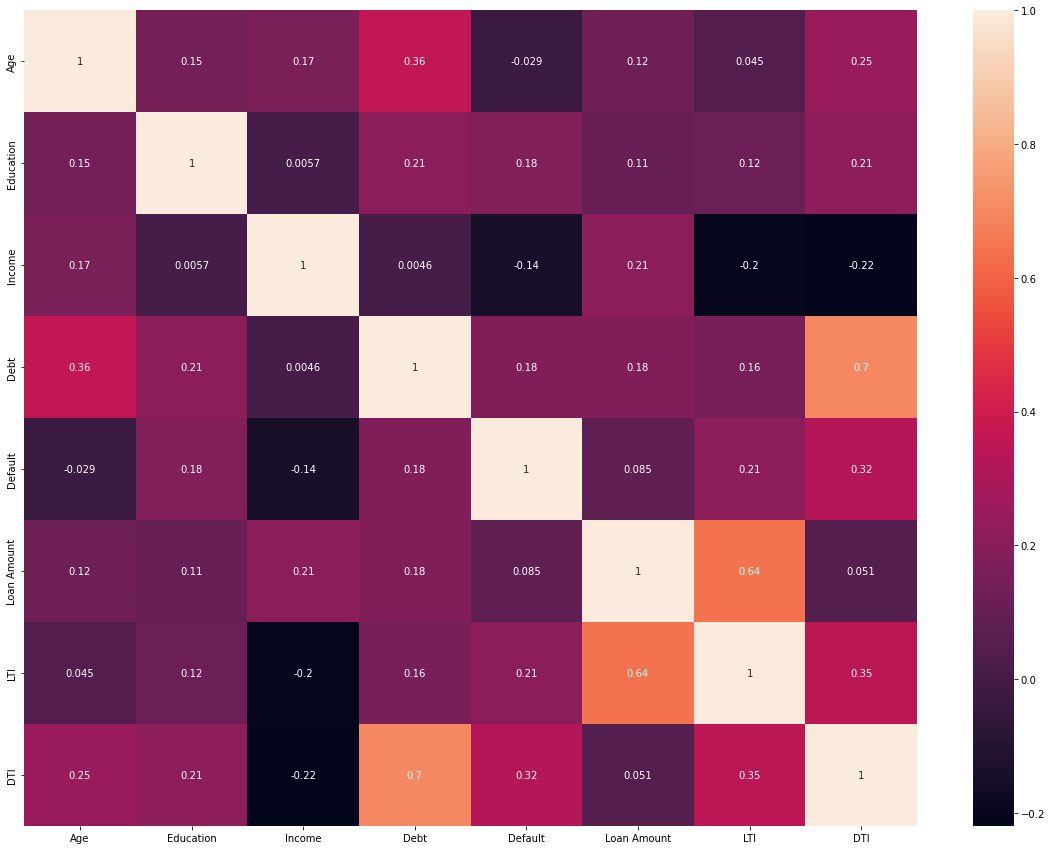

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

corr_matrix = fulldb.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
fulldb['Use of Funds'] = le.fit_transform(fulldb['Use of Funds'])

fulldb['Previous Default'] = le.fit_transform(fulldb['Previous Default'])

fulldb

,Age,Education,Income,Debt,Default,Use of Funds,Loan Amount,LTI,Previous Default,DTI
0,22,1.0,59000,2107.872,1.0,4,35000.0,0.590000,1,0.035727
1,21,1.0,9600,821.280,0.0,1,1000.0,0.100000,0,0.085550
2,25,1.0,9600,868.320,1.0,3,5500.0,0.570000,0,0.090450
3,23,1.0,65500,529.590,1.0,3,35000.0,0.530000,0,0.008085
4,24,1.0,54400,823.050,1.0,3,35000.0,0.550000,1,0.015130
...,...,...,...,...,...,...,...,...,...,...
1145,34,1.0,32000,624.672,0.0,2,13000.0,0.406250,0,0.019521
1146,32,2.0,116000,2585.292,1.0,0,16000.0,0.137931,1,0.022287
1147,48,1.0,38000,3381.696,0.0,1,23000.0,0.605263,0,0.088992
1148,35,2.0,24000,1454.544,0.0,0,11000.0,0.458333,0,0.060606


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#formatting response & feature data
X = fulldb.drop(columns=['Default'])
y = fulldb['Default']

#Splitting data for Test/Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Random Forest Classifier
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)
print(y_pred_tree)
%time

[0. 1. 0. ... 1. 1. 0.]
CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.15 µs


In [17]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression on encoded Train data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predicting Test Data
y_pred_log = logreg.predict(X_test).astype(int)
#print(y_pred_log)
y_pred_log[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
rnd_reg = RandomForestClassifier(random_state=42)
rnd_reg.fit(X_train, y_train)

y_pred_rf = rnd_reg.predict(X_test)
print(y_pred_rf)

[0. 1. 0. ... 1. 1. 0.]


In [19]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_test, y_pred_tree))
print(precision_score(y_test, y_pred_tree))
print(recall_score(y_test, y_pred_tree))

print(accuracy_score(y_test, y_pred_log))
print(precision_score(y_test, y_pred_log))
print(recall_score(y_test, y_pred_log))

print(accuracy_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))

0.9764322241162084
0.936318407960199
0.9572736520854527
0.7732898539983695
0.3446327683615819
0.04136995591726009
0.982064774327429
0.9691507798960138
0.948118006103764


In [20]:
z = logreg.coef_
f = tree_reg.feature_importances_
print(f)
sum(f)

[0.11442302 0.04734952 0.02973432 0.63577668 0.00625937 0.01556201
 0.11313229 0.00366793 0.03409486]


1.0000000000000002